<a href="https://colab.research.google.com/github/RohanGarad/Using-GitHub/blob/main/HandwritingDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np

In [10]:
# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Normalize the data (scaling pixel values between 0 and 1)
X_train, X_test = X_train / 255.0, X_test / 255.0

# Reshape data to add a single channel (grayscale)
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

# One-hot encode the labels (convert to categorical format)
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

print(f"Training data shape: {X_train.shape}")
print(f"Test data shape: {X_test.shape}")

Training data shape: (60000, 28, 28, 1)
Test data shape: (10000, 28, 28, 1)


In [11]:
# Build the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')  # 10 output classes for digits 0-9
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Print model summary
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

In [12]:
# Train the model (use fewer epochs initially to save time)
history = model.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 51s 27ms/step - accuracy: 0.9055 - loss: 0.3026 - val_accuracy: 0.9854 - val_loss: 0.0433
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 49s 26ms/step - accuracy: 0.9859 - loss: 0.0443 - val_accuracy: 0.9866 - val_loss: 0.0395
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 26ms/step - accuracy: 0.9917 - loss: 0.0266 - val_accuracy: 0.9919 - val_loss: 0.0240
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 80s 25ms/step - accuracy: 0.9941 - loss: 0.0184 - val_accuracy: 0.9915 - val_loss: 0.0264
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 83s 26ms/step - accuracy: 0.9957 - loss: 0.0123 - val_accuracy: 0.9871 - val_loss: 0.0397


In [13]:
# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=2)
print(f"Test Accuracy: {test_accuracy:.2f}")

313/313 - 2s - 6ms/step - accuracy: 0.9871 - loss: 0.0397
Test Accuracy: 0.99


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


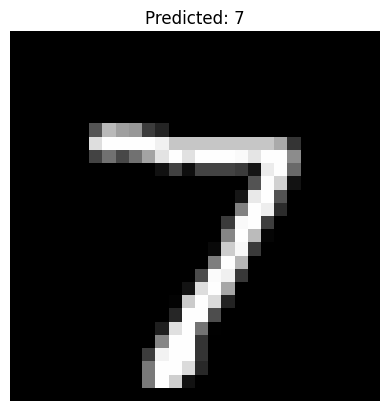

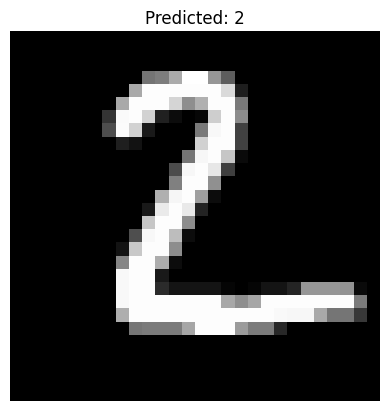

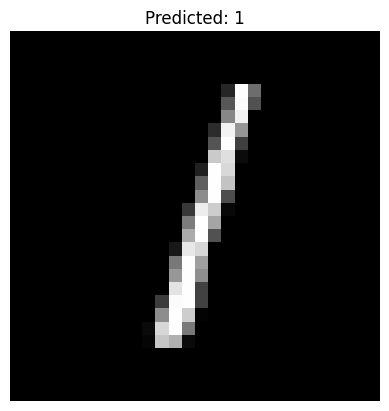

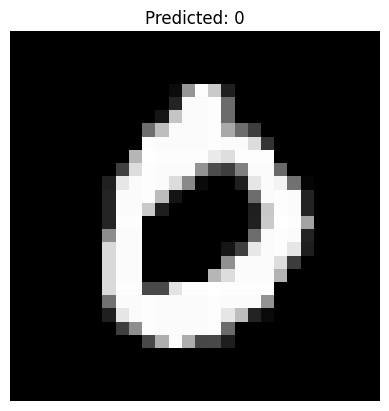

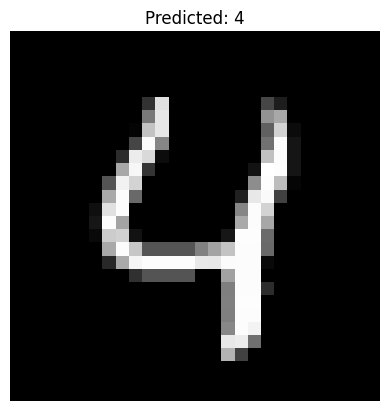

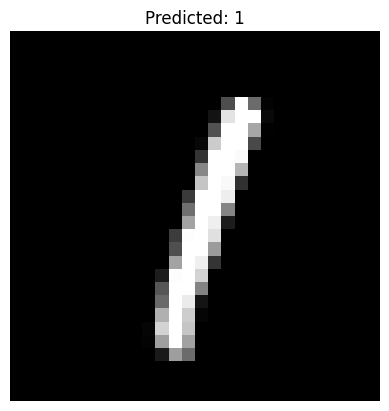

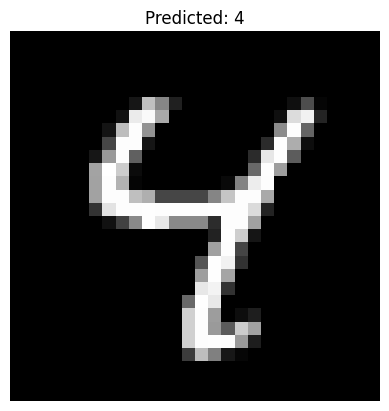

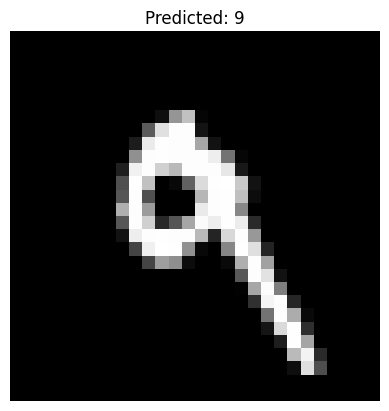

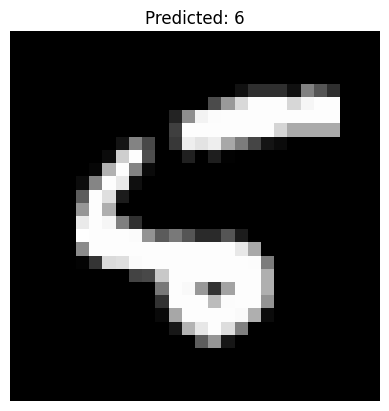

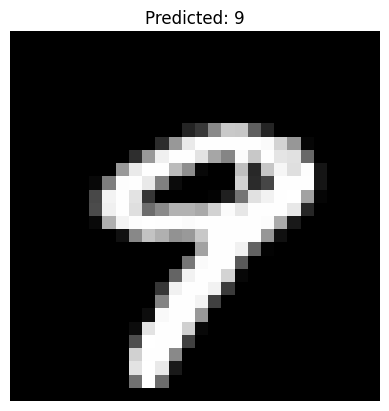

In [47]:
# Predict the first 10 test images
predictions = model.predict(X_test[:10])

# Plot the images with predicted labels
for i in range(10):
    plt.imshow(X_test[i].reshape(28, 28), cmap='gray')
    plt.title(f"Predicted: {np.argmax(predictions[i])}")
    plt.axis('off')
    plt.show()

In [15]:
# Save the model
model.save('mnist_cnn_model.h5')
print("Model saved successfully!")

Model saved successfully!


In [16]:
from google.colab import files
uploaded = files.upload()  # This will open a file selector for uploading

for filename in uploaded.keys():
    print(f"Uploaded file: {filename}")

Saving 1.jfif to 1.jfif
Uploaded file: 1.jfif


In [17]:
!pip install pillow

In [18]:
from PIL import Image, ImageOps

def preprocess_image(image_path):
    # Open the image and convert it to grayscale
    img = Image.open(image_path).convert('L')

    # Resize the image to 28x28 (same as MNIST)
    img = ImageOps.invert(img)  # Invert colors (MNIST has white digits on black)
    img = img.resize((28, 28))

    # Convert the image to a NumPy array and normalize pixel values
    img_array = np.array(img) / 255.0

    # Reshape to match the model input shape (1, 28, 28, 1)
    img_array = img_array.reshape(1, 28, 28, 1)

    return img_array

In [19]:
# Replace 'your_image_file.png' with the uploaded image filename
image_path = list(uploaded.keys())[0]  # Get the uploaded filename

# Preprocess the uploaded image
processed_image = preprocess_image(image_path)

# Make a prediction using the trained model
prediction = model.predict(processed_image)

# Output the predicted digit
predicted_digit = np.argmax(prediction)
print(f"Predicted Digit: {predicted_digit}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step
Predicted Digit: 0


Saving 1111.JPG to 1111.JPG
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


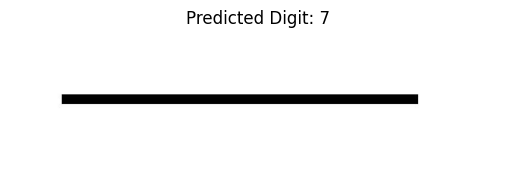


The model predicted the digit as: 7


In [51]:
# Step 1: Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from PIL import Image, ImageOps
from google.colab import files

# Step 2: Upload the trained model (skip if model is already trained and loaded)
# Uncomment this if you saved your trained model as 'mnist_model.h5'
# model = load_model('mnist_model.h5')

# Step 3: File upload function
def upload_and_predict():
    # Prompt the user to upload an image
    uploaded = files.upload()

    # Get the uploaded file name
    image_path = list(uploaded.keys())[0]

    # Preprocess the uploaded image
    processed_image = preprocess_image(image_path)

    # Predict the digit using the trained model
    prediction = model.predict(processed_image)
    predicted_digit = np.argmax(prediction)

    # Display the uploaded image and predicted result
    display_result(image_path, predicted_digit)

# Step 4: Preprocessing function to prepare the image for prediction
def preprocess_image(image_path):
    # Open the image and convert to grayscale
    img = Image.open(image_path).convert('L')

    # Resize the image to 28x28 pixels
    img = ImageOps.invert(img)  # Invert colors for consistency with MNIST
    img = img.resize((28, 28))

    # Convert to NumPy array and normalize pixel values
    img_array = np.array(img) / 255.0

    # Reshape to (1, 28, 28, 1) to match model input shape
    img_array = img_array.reshape(1, 28, 28, 1)
    return img_array

# Step 5: Display the result with the image
def display_result(image_path, predicted_digit):
    # Load and show the uploaded image
    img = Image.open(image_path)
    plt.imshow(img, cmap='gray')
    plt.title(f"Predicted Digit: {predicted_digit}")
    plt.axis('off')
    plt.show()
    print(f"\nThe model predicted the digit as: {predicted_digit}")

# Step 6: Run the upload and prediction process
upload_and_predict()